In [1]:
# import the necessary libraries  

import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for data visualization
from sklearn.preprocessing import StandardScaler   # for feature scaling
from sklearn.model_selection import train_test_split, cross_val_score, KFold   # for splitting the dataset and cross-validation
from sklearn.manifold import TSNE # for dimensionality reduction 
import xgboost as xgb # for XGBoost model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # for regression metrics
from rdkit import Chem # for cheminformatics
from rdkit.Chem import AllChem, Descriptors # for molecular descriptors
import pickle  # for saving and loading models
from lazypredict.Supervised import LazyRegressor # for lazy regression 
import copy
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\lysinec.csv", sep=';')
df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL5882769,NaN,NaN,230.35,0.00,2.19,BDBM256474,Cc1ccccc1C1CC1NC1CCNCC1,IC50,'=',...,CHEMBL5727123,37,BindingDB Patent Bioactivity Data,NaN,2019,NaN,NaN,NaN,NaN,105.00
1,CHEMBL5944874,NaN,NaN,477.57,0.00,4.54,BDBM388893,CN1CCC[C@@H](COc2nc(-c3ccc(C#N)cc3)c(-c3ccc4cn...,IC50,'=',...,CHEMBL5726965,37,BindingDB Patent Bioactivity Data,NaN,2018,NaN,NaN,NaN,NaN,275.00
2,CHEMBL5791199,NaN,NaN,400.57,0.00,3.76,BDBM397505,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(Cc2ccccc2)C1,IC50,'=',...,CHEMBL5727094,37,BindingDB Patent Bioactivity Data,NaN,2018,NaN,NaN,NaN,NaN,30.00
3,CHEMBL5816448,NaN,NaN,455.56,0.00,3.34,BDBM397512,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(c2ccc(C(=O)...,IC50,'<',...,CHEMBL5727094,37,BindingDB Patent Bioactivity Data,NaN,2018,NaN,NaN,NaN,NaN,100.00
4,CHEMBL5966838,NaN,NaN,361.53,0.00,3.73,BDBM397530,c1ccc(C2CC2NCC2CN(C3CCN(c4ccccc4)CC3)C2)cc1,IC50,'=',...,CHEMBL5727094,37,BindingDB Patent Bioactivity Data,NaN,2018,NaN,NaN,NaN,NaN,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,CHEMBL6013083,NaN,NaN,378.52,0.00,3.03,BDBM256661,Cc1nnc(NC(=O)c2csc(C3CC3NCC3CCOCC3)c2)s1,IC50,'<',...,CHEMBL5728378,37,BindingDB Patent Bioactivity Data,NaN,2021,NaN,NaN,NaN,NaN,100.00
9922,CHEMBL5880544,NaN,NaN,348.50,0.00,3.32,BDBM256623,Cc1nnc(NC(=O)c2cc(C3CC3NCC3CC3)c(C)s2)s1,IC50,'=',...,CHEMBL5728378,37,BindingDB Patent Bioactivity Data,NaN,2021,NaN,NaN,NaN,NaN,500.00
9923,CHEMBL5910071,NaN,NaN,412.55,0.00,4.24,BDBM256687,Cc1sc(C2CC2NCC2CCOCC2)cc1C(=O)NC1CCC(F)(F)CC1,IC50,'<',...,CHEMBL5728378,37,BindingDB Patent Bioactivity Data,NaN,2021,NaN,NaN,NaN,NaN,100.00
9924,CHEMBL6059503,NaN,NaN,397.54,0.00,3.77,BDBM243411,NC1CCC(N[C@@H]2C[C@H]2c2cc(C(=O)NC3CCC(F)(F)CC...,IC50,'<',...,CHEMBL5728378,37,BindingDB Patent Bioactivity Data,NaN,2021,NaN,NaN,NaN,NaN,100.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9926 entries, 0 to 9925
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          9926 non-null   object 
 1   Molecule Name               210 non-null    object 
 2   Molecule Max Phase          172 non-null    float64
 3   Molecular Weight            9921 non-null   float64
 4   #RO5 Violations             9853 non-null   float64
 5   AlogP                       9853 non-null   float64
 6   Compound Key                9926 non-null   object 
 7   Smiles                      9921 non-null   object 
 8   Standard Type               9926 non-null   object 
 9   Standard Relation           9848 non-null   object 
 10  Standard Value              9848 non-null   float64
 11  Standard Units              9848 non-null   object 
 12  pChEMBL Value               5281 non-null   float64
 13  Data Validity Comment       135 n

In [4]:
df = df[['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units']]
df

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL5882769,Cc1ccccc1C1CC1NC1CCNCC1,IC50,'=',105.00,nM
1,CHEMBL5944874,CN1CCC[C@@H](COc2nc(-c3ccc(C#N)cc3)c(-c3ccc4cn...,IC50,'=',275.00,nM
2,CHEMBL5791199,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(Cc2ccccc2)C1,IC50,'=',30.00,nM
3,CHEMBL5816448,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(c2ccc(C(=O)...,IC50,'<',100.00,nM
4,CHEMBL5966838,c1ccc(C2CC2NCC2CN(C3CCN(c4ccccc4)CC3)C2)cc1,IC50,'=',30.00,nM
...,...,...,...,...,...,...
9921,CHEMBL6013083,Cc1nnc(NC(=O)c2csc(C3CC3NCC3CCOCC3)c2)s1,IC50,'<',100.00,nM
9922,CHEMBL5880544,Cc1nnc(NC(=O)c2cc(C3CC3NCC3CC3)c(C)s2)s1,IC50,'=',500.00,nM
9923,CHEMBL5910071,Cc1sc(C2CC2NCC2CCOCC2)cc1C(=O)NC1CCC(F)(F)CC1,IC50,'<',100.00,nM
9924,CHEMBL6059503,NC1CCC(N[C@@H]2C[C@H]2c2cc(C(=O)NC3CCC(F)(F)CC...,IC50,'<',100.00,nM


In [5]:
df = df[(df['Standard Relation'] == "'='") & (df['Standard Type'] == 'IC50')]
df.reset_index(drop = True, inplace = True)
df

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL5882769,Cc1ccccc1C1CC1NC1CCNCC1,IC50,'=',105.00,nM
1,CHEMBL5944874,CN1CCC[C@@H](COc2nc(-c3ccc(C#N)cc3)c(-c3ccc4cn...,IC50,'=',275.00,nM
2,CHEMBL5791199,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(Cc2ccccc2)C1,IC50,'=',30.00,nM
3,CHEMBL5966838,c1ccc(C2CC2NCC2CN(C3CCN(c4ccccc4)CC3)C2)cc1,IC50,'=',30.00,nM
4,CHEMBL5824286,N#CCC1(N2CCC(CNC3CC3c3ccccc3)CC2)CN(c2ccc(C#N)...,IC50,'=',30.00,nM
...,...,...,...,...,...,...
5337,CHEMBL5765051,O=C(O)c1ccc(N2CCC(c3nc(C4(CN[C@H]5CC5c5ccccc5)...,IC50,'=',300.00,nM
5338,CHEMBL5986567,O=C(O)c1cccc(-c2nc(C3(CN[C@H]4CC4c4ccccc4)CCC3...,IC50,'=',300.00,nM
5339,CHEMBL5802576,c1ccc(C2C[C@@H]2NCC2(c3noc([C@@H]4CCCNC4)n3)CC...,IC50,'=',75.00,nM
5340,CHEMBL5996172,CN[C@H]1CC[C@H](c2nc(C3(CN[C@@H]4C[C@H]4c4cccc...,IC50,'=',75.00,nM


In [6]:
df['Standard Units'].value_counts()

Standard Units
nM    5342
Name: count, dtype: int64

In [7]:
df.isna().sum()

Molecule ChEMBL ID    0
Smiles                4
Standard Type         0
Standard Relation     0
Standard Value        0
Standard Units        0
dtype: int64

In [8]:
df.dropna(inplace= True)
df.reset_index(drop = True, inplace = True)
df

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL5882769,Cc1ccccc1C1CC1NC1CCNCC1,IC50,'=',105.00,nM
1,CHEMBL5944874,CN1CCC[C@@H](COc2nc(-c3ccc(C#N)cc3)c(-c3ccc4cn...,IC50,'=',275.00,nM
2,CHEMBL5791199,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(Cc2ccccc2)C1,IC50,'=',30.00,nM
3,CHEMBL5966838,c1ccc(C2CC2NCC2CN(C3CCN(c4ccccc4)CC3)C2)cc1,IC50,'=',30.00,nM
4,CHEMBL5824286,N#CCC1(N2CCC(CNC3CC3c3ccccc3)CC2)CN(c2ccc(C#N)...,IC50,'=',30.00,nM
...,...,...,...,...,...,...
5333,CHEMBL5765051,O=C(O)c1ccc(N2CCC(c3nc(C4(CN[C@H]5CC5c5ccccc5)...,IC50,'=',300.00,nM
5334,CHEMBL5986567,O=C(O)c1cccc(-c2nc(C3(CN[C@H]4CC4c4ccccc4)CCC3...,IC50,'=',300.00,nM
5335,CHEMBL5802576,c1ccc(C2C[C@@H]2NCC2(c3noc([C@@H]4CCCNC4)n3)CC...,IC50,'=',75.00,nM
5336,CHEMBL5996172,CN[C@H]1CC[C@H](c2nc(C3(CN[C@@H]4C[C@H]4c4cccc...,IC50,'=',75.00,nM


In [9]:
df.isna().sum()

Molecule ChEMBL ID    0
Smiles                0
Standard Type         0
Standard Relation     0
Standard Value        0
Standard Units        0
dtype: int64

In [10]:
df = df.drop_duplicates(subset= 'Smiles')
df.reset_index(drop= True, inplace = True)
df

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL5882769,Cc1ccccc1C1CC1NC1CCNCC1,IC50,'=',105.00,nM
1,CHEMBL5944874,CN1CCC[C@@H](COc2nc(-c3ccc(C#N)cc3)c(-c3ccc4cn...,IC50,'=',275.00,nM
2,CHEMBL5791199,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(Cc2ccccc2)C1,IC50,'=',30.00,nM
3,CHEMBL5966838,c1ccc(C2CC2NCC2CN(C3CCN(c4ccccc4)CC3)C2)cc1,IC50,'=',30.00,nM
4,CHEMBL5824286,N#CCC1(N2CCC(CNC3CC3c3ccccc3)CC2)CN(c2ccc(C#N)...,IC50,'=',30.00,nM
...,...,...,...,...,...,...
3474,CHEMBL5857831,COc1ccc(C2CC2NCc2cn3c(n2)CN(CCCc2ccc(C(=O)NO)c...,IC50,'=',1100.00,nM
3475,CHEMBL5765051,O=C(O)c1ccc(N2CCC(c3nc(C4(CN[C@H]5CC5c5ccccc5)...,IC50,'=',300.00,nM
3476,CHEMBL5986567,O=C(O)c1cccc(-c2nc(C3(CN[C@H]4CC4c4ccccc4)CCC3...,IC50,'=',300.00,nM
3477,CHEMBL5802576,c1ccc(C2C[C@@H]2NCC2(c3noc([C@@H]4CCCNC4)n3)CC...,IC50,'=',75.00,nM


In [11]:
def pIC50(input): # function to convert IC50 values from nM to pIC50
    pIC50 = []
    for i in input['Standard Value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))
    input['pIC50'] = pIC50
    return input

def remove_outliers(input):  # function to remove outliers using the 'pIC50' column
    Q1 = input['pIC50'].quantile(0.25)
    Q3 = input['pIC50'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    input = input[(input['pIC50'] > lower_bound) & (input['pIC50'] < upper_bound)]
    return input

def Bioactivity_Class(input): # function to classify bioactivity based on the 'Standard Value' column
    bioactivity = []
    for i in input['Standard Value']:        
        if i <= 1000:
            bioactivity.append("Active")
        else:
            bioactivity.append('Inactive')
        
    input['bioactivity'] = bioactivity
    return input

In [12]:
df = remove_outliers(Bioactivity_Class(pIC50(df)))
df.reset_index(drop= True, inplace = True) 
df

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pIC50,bioactivity
0,CHEMBL5882769,Cc1ccccc1C1CC1NC1CCNCC1,IC50,'=',105.00,nM,6.98,Active
1,CHEMBL5944874,CN1CCC[C@@H](COc2nc(-c3ccc(C#N)cc3)c(-c3ccc4cn...,IC50,'=',275.00,nM,6.56,Active
2,CHEMBL5791199,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(Cc2ccccc2)C1,IC50,'=',30.00,nM,7.52,Active
3,CHEMBL5966838,c1ccc(C2CC2NCC2CN(C3CCN(c4ccccc4)CC3)C2)cc1,IC50,'=',30.00,nM,7.52,Active
4,CHEMBL5824286,N#CCC1(N2CCC(CNC3CC3c3ccccc3)CC2)CN(c2ccc(C#N)...,IC50,'=',30.00,nM,7.52,Active
...,...,...,...,...,...,...,...,...
3468,CHEMBL5857831,COc1ccc(C2CC2NCc2cn3c(n2)CN(CCCc2ccc(C(=O)NO)c...,IC50,'=',1100.00,nM,5.96,Inactive
3469,CHEMBL5765051,O=C(O)c1ccc(N2CCC(c3nc(C4(CN[C@H]5CC5c5ccccc5)...,IC50,'=',300.00,nM,6.52,Active
3470,CHEMBL5986567,O=C(O)c1cccc(-c2nc(C3(CN[C@H]4CC4c4ccccc4)CCC3...,IC50,'=',300.00,nM,6.52,Active
3471,CHEMBL5802576,c1ccc(C2C[C@@H]2NCC2(c3noc([C@@H]4CCCNC4)n3)CC...,IC50,'=',75.00,nM,7.12,Active


In [13]:
df.Smiles.nunique()

3473

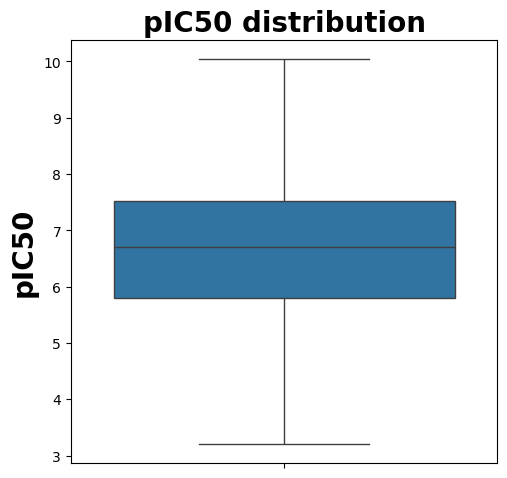

In [14]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(y= 'pIC50', data=df)
plt.title('pIC50 distribution', fontsize=20, fontweight= 'bold')
plt.ylabel('pIC50', fontsize=20, fontweight = 'bold')

plt.savefig('pIC50_boxplot.png', dpi=300, bbox_inches='tight')

In [15]:
color = {'Active': 'green', 'Inactive':'red'} # color dictionary for the bioactivity classes

In [16]:
def Lipinski(df): # function to calculate Lipinski's rule of five descriptors
    MW, HBA, HBD, RB, LogP, scores,Lipinski = [], [], [], [], [], [],[]  # initialize empty lists to store the calculated descriptors
    for i in df['Smiles']: # iterate through the 'Smiles' column
        score = 0
        mol = Chem.MolFromSmiles(i)
        MW.append(Descriptors.MolWt(mol))
        if Descriptors.MolWt(mol) > 500:  # check if molecular weight is greater than 500
            score += 1
        HBA.append(Descriptors.NumHAcceptors(mol))
        if Descriptors.NumHAcceptors(mol) > 10: # check if number of hydrogen bond acceptors is greater than 10
            score += 1
        HBD.append(Descriptors.NumHDonors(mol))
        if Descriptors.NumHDonors(mol) > 5: # check if number of hydrogen bond donors is greater than 5
            score += 1
        RB.append(Chem.rdMolDescriptors.CalcNumRotatableBonds(mol))
        LogP.append(Descriptors.MolLogP(mol))
        if Descriptors.MolLogP(mol) > 5: # check if LogP value is greater than 5
            score += 1
        scores.append(score)
        if score > 1: # check if the total score is greater than 1
            Lipinski.append('fail')
        else:
            Lipinski.append('pass')
        
    df['MW'] = MW
    df['HBA'] = HBA
    df['HBD'] = HBD
    df['RB'] = RB
    df['LogP'] = LogP
    df['scores'] = scores
    df['Lipinski'] = Lipinski
    return df


def lipinski_graph(df, column): # function to plot the distribution of Lipinski's descriptors
    plt.figure(figsize=(6, 6)) # set the figure size
    sns.boxplot(data=df, y=column, x='bioactivity', palette=color)  
    plt.title(f'{column} distribution', fontsize=20, fontweight='bold')
    plt.ylabel(column, fontsize=14, fontweight='bold')
    plt.savefig(f'{column}_boxplot.png', dpi=300, bbox_inches='tight')

    
    

In [17]:
df_clean = df[['Molecule ChEMBL ID', 'Smiles', 'pIC50', 'bioactivity']] #select relevant columns for the analysis
df_clean

,Molecule ChEMBL ID,Smiles,pIC50,bioactivity
0,CHEMBL5882769,Cc1ccccc1C1CC1NC1CCNCC1,6.98,Active
1,CHEMBL5944874,CN1CCC[C@@H](COc2nc(-c3ccc(C#N)cc3)c(-c3ccc4cn...,6.56,Active
2,CHEMBL5791199,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(Cc2ccccc2)C1,7.52,Active
3,CHEMBL5966838,c1ccc(C2CC2NCC2CN(C3CCN(c4ccccc4)CC3)C2)cc1,7.52,Active
4,CHEMBL5824286,N#CCC1(N2CCC(CNC3CC3c3ccccc3)CC2)CN(c2ccc(C#N)...,7.52,Active
...,...,...,...,...
3468,CHEMBL5857831,COc1ccc(C2CC2NCc2cn3c(n2)CN(CCCc2ccc(C(=O)NO)c...,5.96,Inactive
3469,CHEMBL5765051,O=C(O)c1ccc(N2CCC(c3nc(C4(CN[C@H]5CC5c5ccccc5)...,6.52,Active
3470,CHEMBL5986567,O=C(O)c1cccc(-c2nc(C3(CN[C@H]4CC4c4ccccc4)CCC3...,6.52,Active
3471,CHEMBL5802576,c1ccc(C2C[C@@H]2NCC2(c3noc([C@@H]4CCCNC4)n3)CC...,7.12,Active


In [18]:
df_clean.bioactivity.value_counts()

bioactivity
Active      2512
Inactive     961
Name: count, dtype: int64

In [19]:
df_details = Lipinski(df_clean) #apply the Lipinski function to the dataframe
df_details

,Molecule ChEMBL ID,Smiles,pIC50,bioactivity,MW,HBA,HBD,RB,LogP,scores,Lipinski
0,CHEMBL5882769,Cc1ccccc1C1CC1NC1CCNCC1,6.98,Active,230.35,2,2,3,2.19,0,pass
1,CHEMBL5944874,CN1CCC[C@@H](COc2nc(-c3ccc(C#N)cc3)c(-c3ccc4cn...,6.56,Active,477.57,8,0,5,4.54,0,pass
2,CHEMBL5791199,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(Cc2ccccc2)C1,7.52,Active,400.57,4,1,7,3.76,0,pass
3,CHEMBL5966838,c1ccc(C2CC2NCC2CN(C3CCN(c4ccccc4)CC3)C2)cc1,7.52,Active,361.53,3,1,6,3.73,0,pass
4,CHEMBL5824286,N#CCC1(N2CCC(CNC3CC3c3ccccc3)CC2)CN(c2ccc(C#N)...,7.52,Active,425.58,5,1,7,3.89,0,pass
...,...,...,...,...,...,...,...,...,...,...,...
3468,CHEMBL5857831,COc1ccc(C2CC2NCc2cn3c(n2)CN(CCCc2ccc(C(=O)NO)c...,5.96,Inactive,475.59,7,3,10,3.10,0,pass
3469,CHEMBL5765051,O=C(O)c1ccc(N2CCC(c3nc(C4(CN[C@H]5CC5c5ccccc5)...,6.52,Active,458.56,6,2,8,4.33,0,pass
3470,CHEMBL5986567,O=C(O)c1cccc(-c2nc(C3(CN[C@H]4CC4c4ccccc4)CCC3...,6.52,Active,389.46,5,2,7,4.00,0,pass
3471,CHEMBL5802576,c1ccc(C2C[C@@H]2NCC2(c3noc([C@@H]4CCCNC4)n3)CC...,7.12,Active,338.46,5,2,6,2.71,0,pass


In [20]:
df_details.to_csv('LSD1_cleaned.csv', index = False) # save the cleaned dataframe to a csv file

In [21]:
df_details = pd.read_csv('LSD1_cleaned.csv') # read the cleaned dataframe from the CSV file

In [22]:
df_clean = df_details[['Molecule ChEMBL ID', 'Smiles', 'pIC50', 'bioactivity', 'MW', 'HBA', 'HBD', 'RB', 'LogP', 'scores', 'Lipinski']]
df_clean

,Molecule ChEMBL ID,Smiles,pIC50,bioactivity,MW,HBA,HBD,RB,LogP,scores,Lipinski
0,CHEMBL5882769,Cc1ccccc1C1CC1NC1CCNCC1,6.98,Active,230.35,2,2,3,2.19,0,pass
1,CHEMBL5944874,CN1CCC[C@@H](COc2nc(-c3ccc(C#N)cc3)c(-c3ccc4cn...,6.56,Active,477.57,8,0,5,4.54,0,pass
2,CHEMBL5791199,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(Cc2ccccc2)C1,7.52,Active,400.57,4,1,7,3.76,0,pass
3,CHEMBL5966838,c1ccc(C2CC2NCC2CN(C3CCN(c4ccccc4)CC3)C2)cc1,7.52,Active,361.53,3,1,6,3.73,0,pass
4,CHEMBL5824286,N#CCC1(N2CCC(CNC3CC3c3ccccc3)CC2)CN(c2ccc(C#N)...,7.52,Active,425.58,5,1,7,3.89,0,pass
...,...,...,...,...,...,...,...,...,...,...,...
3468,CHEMBL5857831,COc1ccc(C2CC2NCc2cn3c(n2)CN(CCCc2ccc(C(=O)NO)c...,5.96,Inactive,475.59,7,3,10,3.10,0,pass
3469,CHEMBL5765051,O=C(O)c1ccc(N2CCC(c3nc(C4(CN[C@H]5CC5c5ccccc5)...,6.52,Active,458.56,6,2,8,4.33,0,pass
3470,CHEMBL5986567,O=C(O)c1cccc(-c2nc(C3(CN[C@H]4CC4c4ccccc4)CCC3...,6.52,Active,389.46,5,2,7,4.00,0,pass
3471,CHEMBL5802576,c1ccc(C2C[C@@H]2NCC2(c3noc([C@@H]4CCCNC4)n3)CC...,7.12,Active,338.46,5,2,6,2.71,0,pass


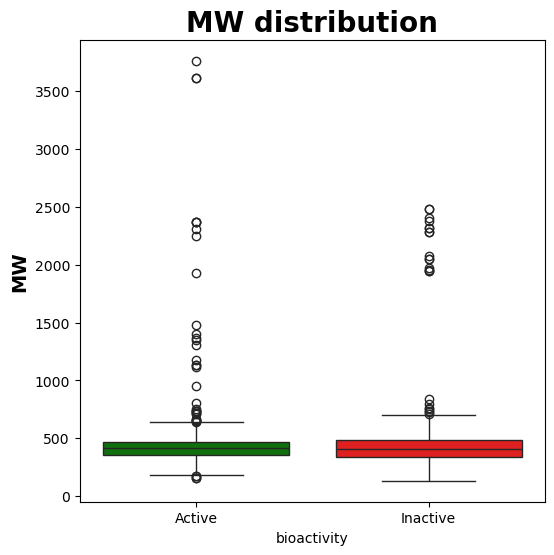

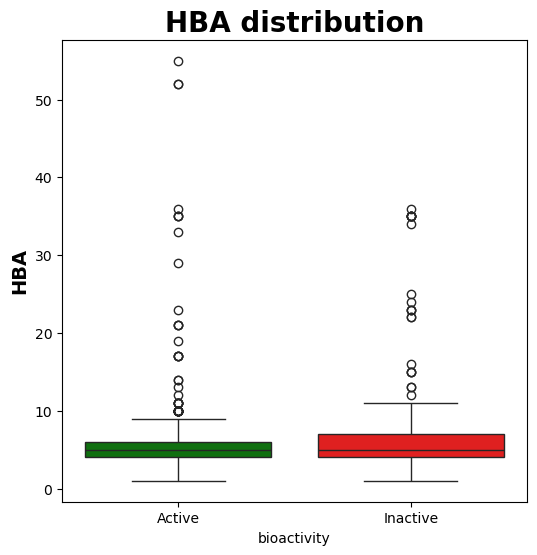

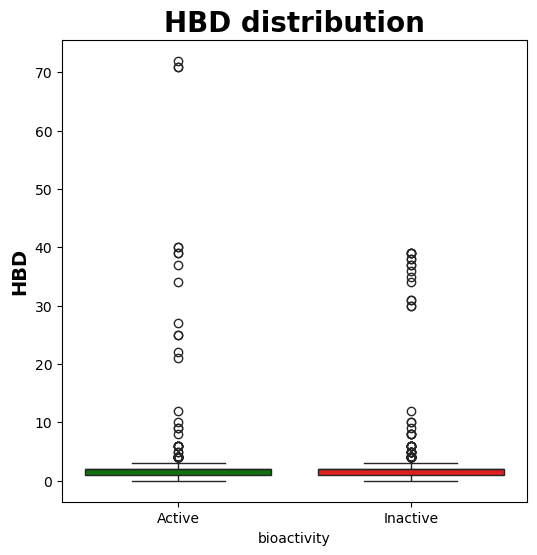

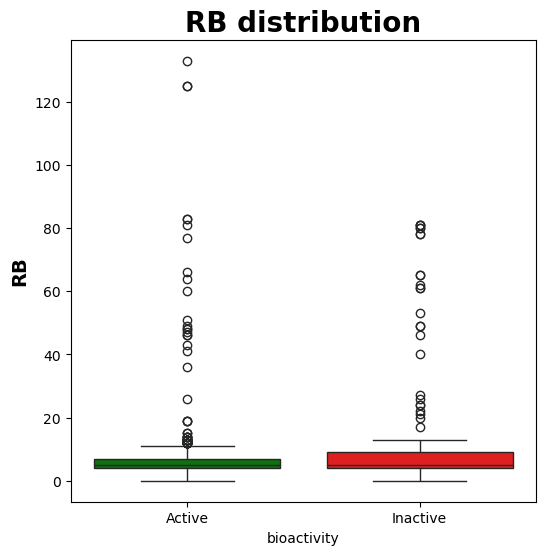

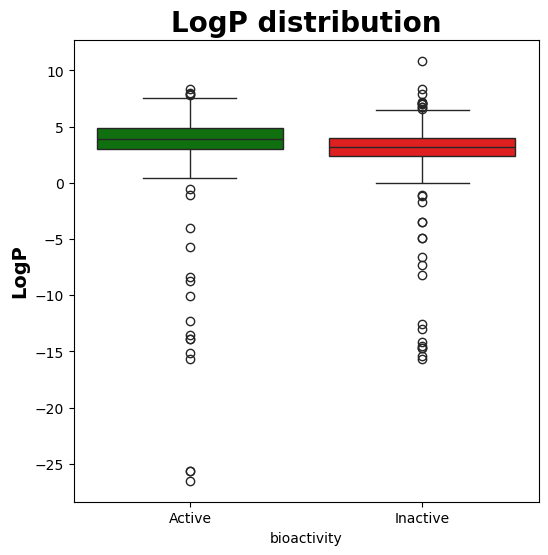

In [23]:
for i in ['MW','HBA', 'HBD', 'RB', 'LogP']: # iterate through this list containing Lipinski descriptors
    lipinski_graph(df_details,i)

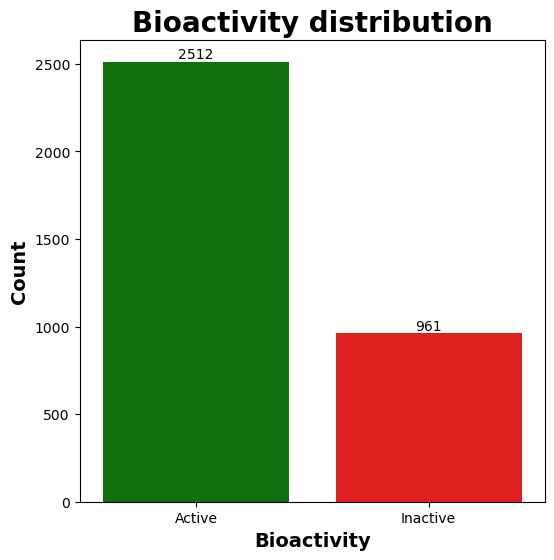

In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_details, x='bioactivity', palette=color, order=df_details['bioactivity'].value_counts().index)
plt.title('Bioactivity distribution', fontsize=20, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
for i in range(len(df_details['bioactivity'].value_counts())):
    plt.text(i, df_details['bioactivity'].value_counts()[i], df_details['bioactivity'].value_counts()[i], ha='center', va='bottom')

plt.savefig('bioactivity_distribution.png', dpi=300, bbox_inches='tight')

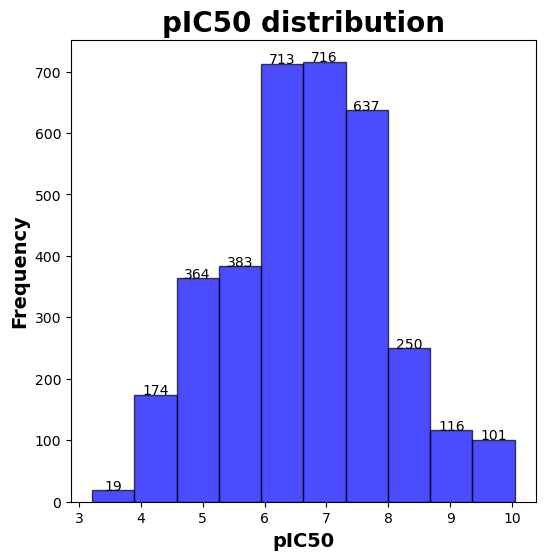

In [26]:
# Plot the distribution of pIC50 values(histogram)
plt.figure(figsize=(6, 6))
n, bins, patches = plt.hist(df_details['pIC50'], bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('pIC50 distribution', fontsize=20, fontweight='bold')
plt.xlabel('pIC50', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
for i in  range(len(bins) - 1):
    plt.text((bins[i] + bins[i + 1]) / 2, n[i], 
             str(int(n[i])), ha='center')
plt.savefig('pIC50_distribution_hist.png', dpi=300, bbox_inches='tight')

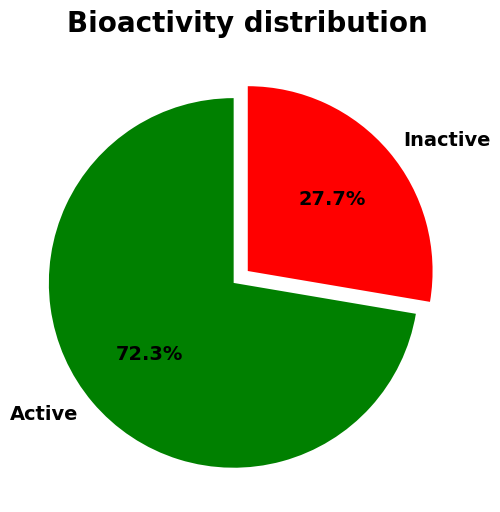

In [24]:
# Plot the distribution of bioactivity classes(pie chart)
plt.figure(figsize=(6, 6))
plt.pie(df_details['bioactivity'].value_counts(), labels=df_details['bioactivity'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=[color[i] for i in df_details['bioactivity'].value_counts().index], textprops={'fontsize': 14, 'fontweight': 'bold'},explode=(0.1, 0))
plt.title('Bioactivity distribution', fontsize=20, fontweight='bold')
plt.savefig('bioactivity_distribution_pie.png', dpi=300, bbox_inches='tight')

In [25]:
df_clean = df_clean[['Smiles', 'pIC50']] # select relevant columns for model training
df_clean

,Smiles,pIC50
0,Cc1ccccc1C1CC1NC1CCNCC1,6.98
1,CN1CCC[C@@H](COc2nc(-c3ccc(C#N)cc3)c(-c3ccc4cn...,6.56
2,N#CCC1(N2CCC(NC3CC3c3ccccc3)CC2)CN(Cc2ccccc2)C1,7.52
3,c1ccc(C2CC2NCC2CN(C3CCN(c4ccccc4)CC3)C2)cc1,7.52
4,N#CCC1(N2CCC(CNC3CC3c3ccccc3)CC2)CN(c2ccc(C#N)...,7.52
...,...,...
3468,COc1ccc(C2CC2NCc2cn3c(n2)CN(CCCc2ccc(C(=O)NO)c...,5.96
3469,O=C(O)c1ccc(N2CCC(c3nc(C4(CN[C@H]5CC5c5ccccc5)...,6.52
3470,O=C(O)c1cccc(-c2nc(C3(CN[C@H]4CC4c4ccccc4)CCC3...,6.52
3471,c1ccc(C2C[C@@H]2NCC2(c3noc([C@@H]4CCCNC4)n3)CC...,7.12


In [26]:
def embbedings(df_clean): # function to generate molecular fingerprints using RDKit
    embedding = []
    for i in df_clean['Smiles']:
        molecule = Chem.MolFromSmiles(i)
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=2048)
        fingerprint_array = np.array(fingerprint)
        embedding.append(fingerprint_array)
    df = pd.DataFrame(embedding)
    df_i = df_clean.pIC50
    df = pd.concat([df, df_i], axis=1)
    return df


df_final = embbedings(df_clean)


[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerator
[13:47:57] DEPRECATION WARNING: please use MorganGenerat

In [27]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.98
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.56
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.52
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.52
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.96
3469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.52
3470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.52
3471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.12


In [28]:
# split the dataset into training and testing sets
X = df_final.drop('pIC50', axis=1) 
y = df_final['pIC50']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # check the shapes of the training and testing sets

((2778, 2048), (695, 2048), (2778,), (695,))

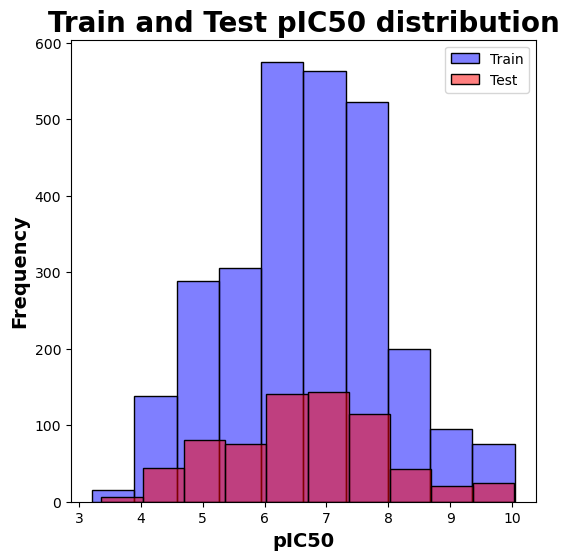

In [30]:
# plot the distribution of pIC50 values in the training and testing sets
plt.figure(figsize=(6, 6))
sns.histplot(y_train, color='blue', alpha=0.5, bins=10)
sns.histplot(y_test, color='red', alpha=0.5, bins=10)
plt.title('Train and Test pIC50 distribution', fontsize=20, fontweight='bold')
plt.xlabel('pIC50', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.legend(['Train', 'Test'])
plt.savefig('train_test_pIC50_distribution.png', dpi=300, bbox_inches='tight')

  File "c:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\user\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\anaconda3\Lib\subprocess.py",

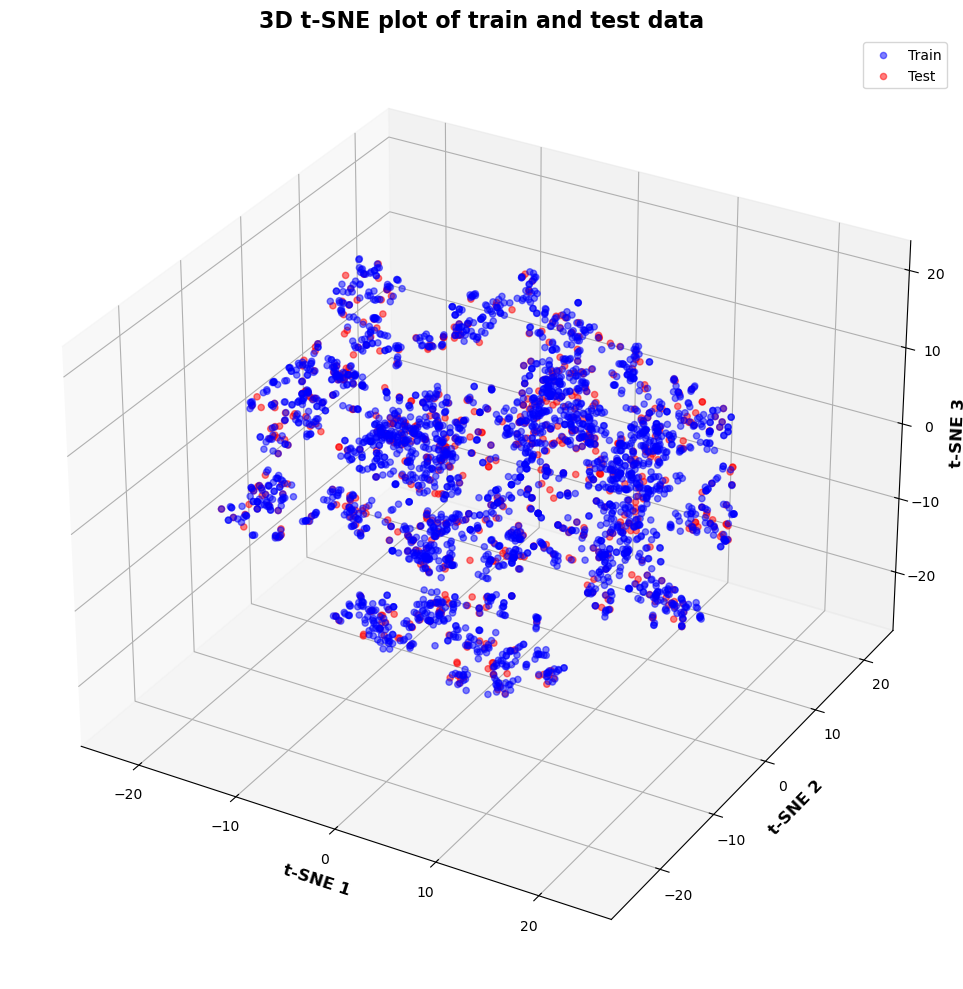

In [31]:
# tsne visualization  

x_combined = np.vstack((X_train, X_test))  # combine the training and testing sets for t-SNE visualization
tsne = TSNE(n_components=3, random_state=42) # initialize t-SNE with 3 components
x_tsne = tsne.fit_transform(x_combined) # fit t-SNE to the combined data
x_tsne_train = x_tsne[:X_train.shape[0]] # split the t-SNE output into training and testing sets
x_tsne_test = x_tsne[X_train.shape[0]:]    # split the t-SNE output into training and testing sets

# plot the t-SNE visualization
plt.figure(figsize=(12, 10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x_tsne_train[:, 0], x_tsne_train[:, 1], x_tsne_train[:, 2], color='blue', alpha=0.5, label='Train')
ax.scatter(x_tsne_test[:, 0], x_tsne_test[:, 1], x_tsne_test[:, 2], color='red', alpha=0.5, label='Test')
ax.set_xlabel('t-SNE 1', fontsize=12, fontweight='bold')
ax.set_ylabel('t-SNE 2', fontsize=12, fontweight='bold')
ax.set_zlabel('t-SNE 3', fontsize=12, fontweight='bold')
ax.set_title('3D t-SNE plot of train and test data', fontsize=16, fontweight='bold')


plt.legend()
plt.tight_layout()






plt.savefig('TSNE.png', dpi=300, bbox_inches='tight')


In [32]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None) # initialize the LazyRegressor
# fit the model to the training and testing sets
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2826
[LightGBM] [Info] Number of data points in the train set: 2778, number of used features: 942
[LightGBM] [Info] Start training from score 6.680432


In [33]:
df_lazy = models.sort_values('R-Squared', ascending=False) # sort the models by R-Squared value
df_lazy


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,1.11,0.79,0.60,1.26
HistGradientBoostingRegressor,1.11,0.79,0.60,22.97
RandomForestRegressor,1.12,0.77,0.62,29.13
XGBRegressor,1.12,0.76,0.63,1.86
BaggingRegressor,1.13,0.75,0.65,5.30
GammaRegressor,1.14,0.74,0.67,0.48
TweedieRegressor,1.14,0.73,0.68,0.55
BayesianRidge,1.14,0.73,0.68,16.09
ElasticNetCV,1.14,0.73,0.68,129.53


[(0.0, 1.0)]

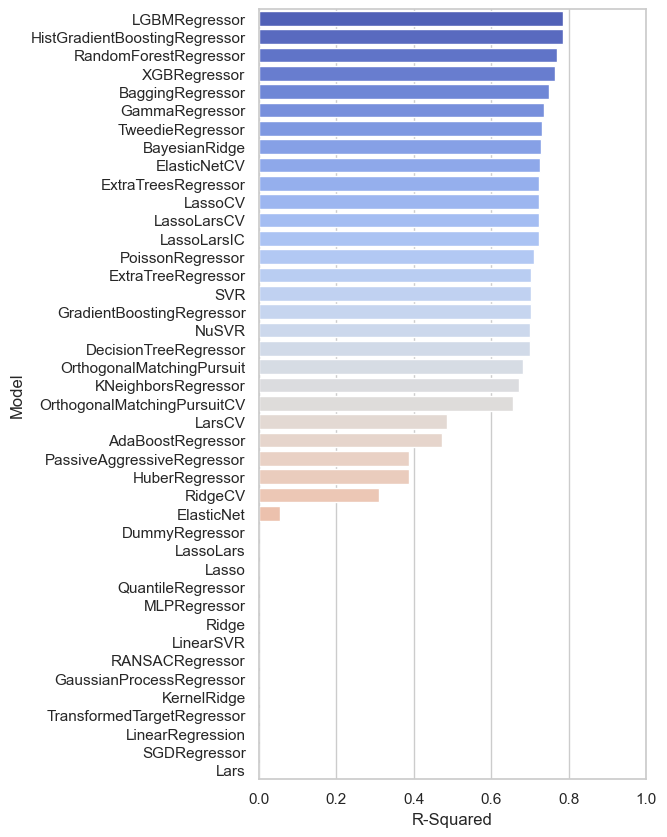

In [34]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=df_lazy.index, x="R-Squared", data=df_lazy, palette='coolwarm')
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

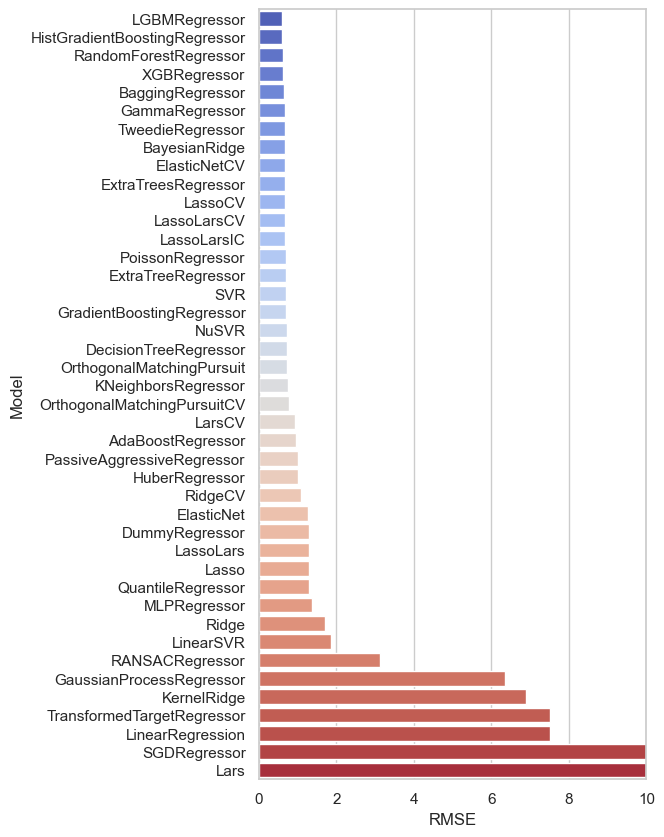

In [35]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=df_lazy.index, x="RMSE", data=df_lazy, palette='coolwarm')
ax.set(xlim=(0, 10))

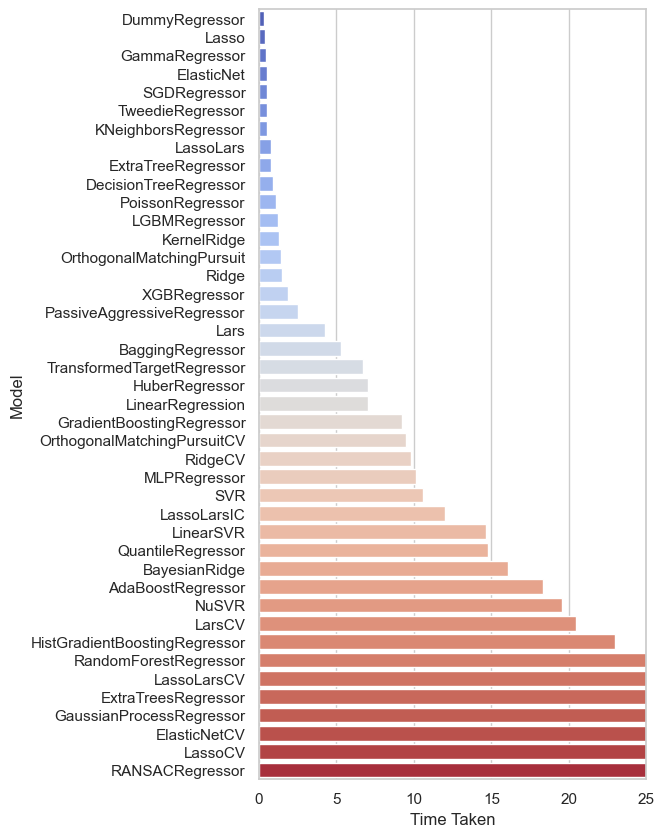

In [36]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    y=df_lazy.index, 
    x="Time Taken", 
    data=df_lazy, 
    palette='coolwarm',
    order=df_lazy.sort_values("Time Taken").index  # ensures ascending order
)
ax.set(xlim=(0, 25))
plt.show()


In [37]:
from lightgbm import LGBMRegressor

In [38]:
# cross-validation to check the performance of the model
X = df_final.drop('pIC50', axis=1)  # features
y = df_final['pIC50']  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # split the dataset into training and testing sets
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # K-Fold cross-validation
model = LGBMRegressor(n_estimators=100, random_state=42)  # Random Forest model
# rmse
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring = 'neg_mean_squared_error')  # cross-validation with negative mean squared error
scores = np.sqrt(-scores)  # convert negative mean squared error to root mean squared error
print("Cross-validated RMSE: ", scores)  # print the mean root mean squared error

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 2222, number of used features: 829
[LightGBM] [Info] Start training from score 6.680597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data points in the train set: 2222, number of used features: 823
[LightGBM] [Info] Start training from score 6.676055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

In [39]:
from sklearn.ensemble import (
    RandomForestRegressor,
    HistGradientBoostingRegressor,
    GradientBoostingRegressor,
    BaggingRegressor
)
from sklearn.linear_model import (
    LassoCV,
    ElasticNetCV,
    BayesianRidge,
    TweedieRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time 




model = { 'RanomdForestRegressor': RandomForestRegressor(),
          'HistGradientBoostingRegressor': HistGradientBoostingRegressor(),
          'GradientBoostingRegressor': GradientBoostingRegressor(),
          'BaggingRegressor': BaggingRegressor(),
          'LassoCV': LassoCV(),
          'ElasticNetCV': ElasticNetCV(),
          'BayesianRidge': BayesianRidge(),
          'TweedieRegressor': TweedieRegressor(),
          'XGBRegressor': XGBRegressor(),
          'LGBMRegressor': LGBMRegressor()
        }


model_name = []
model_r2 = []
model_rmse = []
model_mae = []
model_time = []

for name, model in model.items():
    start = time.time()
    model.fit(X_train, y_train) # fit the model to the training data
    end = time.time()
    
    y_pred = model.predict(X_test) # make predictions on the testing data
    
    r2 = r2_score(y_test, y_pred) # calculate R-Squared value
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # calculate RMSE
    mae = mean_absolute_error(y_test, y_pred) # calculate MAE
    
    model_name.append(name)
    model_r2.append(r2)
    model_rmse.append(rmse)
    model_mae.append(mae)
    model_time.append(end - start)


df_model = pd.DataFrame({'Model': model_name, 'R-Squared': model_r2, 'RMSE': model_rmse, 'MAE': model_mae, 'Time': model_time}) # create a dataframe to store the results
df_model = df_model.sort_values('R-Squared', ascending=False) # sort the dataframe by R-Squared value
df_model = df_model.reset_index(drop=True) # reset the index of the dataframe
df_model





[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1884
[LightGBM] [Info] Number of data points in the train set: 2778, number of used features: 942
[LightGBM] [Info] Start training from score 6.680432


,Model,R-Squared,RMSE,MAE,Time
0,LGBMRegressor,0.79,0.60,0.43,0.71
1,HistGradientBoostingRegressor,0.79,0.60,0.43,21.49
2,RanomdForestRegressor,0.77,0.62,0.42,31.85
3,XGBRegressor,0.76,0.63,0.44,5.03
4,BayesianRidge,0.76,0.63,0.45,10.34
5,ElasticNetCV,0.75,0.65,0.47,74.71
6,BaggingRegressor,0.75,0.65,0.44,8.37
7,LassoCV,0.74,0.66,0.48,83.51
8,GradientBoostingRegressor,0.70,0.71,0.52,9.45
9,TweedieRegressor,0.46,0.96,0.75,0.42


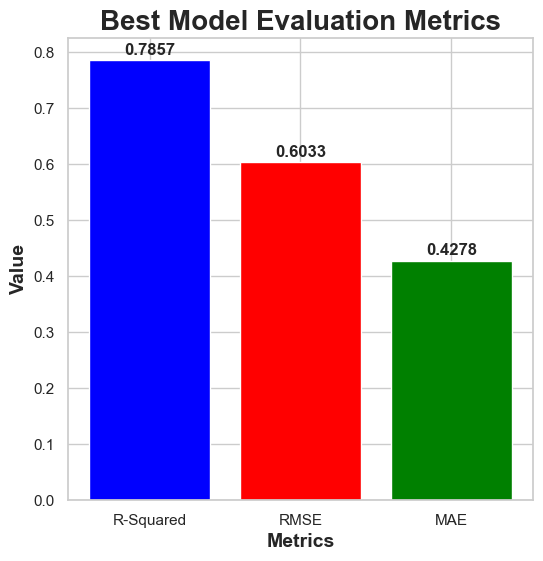

In [40]:
#plot the evaluation metrics    
plt.figure(figsize=(6, 6))
plt.bar(['R-Squared', 'RMSE', 'MAE'], [r2, rmse, mae], color=['blue', 'red', 'green'])
plt.title('Best Model Evaluation Metrics', fontsize=20, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.xlabel('Metrics', fontsize=14, fontweight='bold')
for i, v in enumerate([r2, rmse, mae]):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center', fontweight='bold')
plt.savefig('best_model_evaluation_metrics.png', dpi=300, bbox_inches='tight')

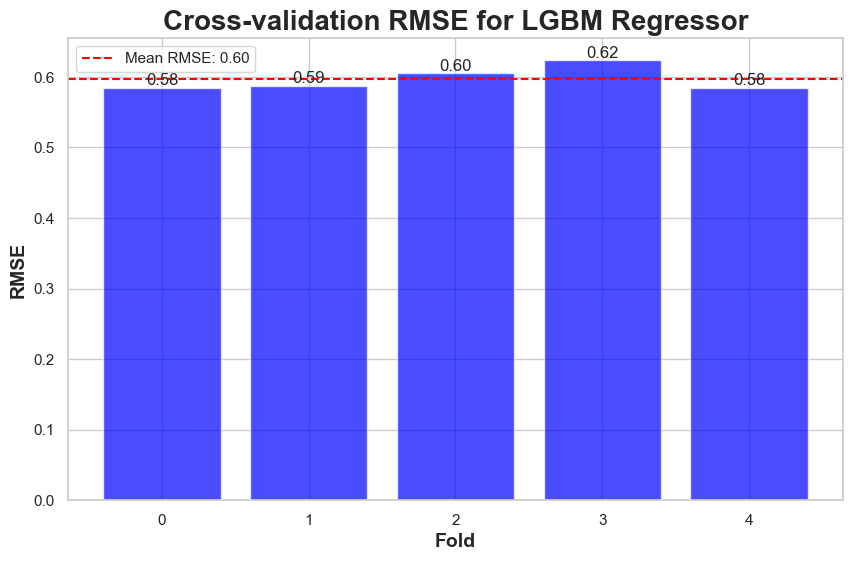

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(scores)), scores, color='blue', alpha=0.7)
plt.title('Cross-validation RMSE for LGBM Regressor', fontsize=20, fontweight='bold')
plt.xlabel('Fold', fontsize=14, fontweight='bold')
plt.ylabel('RMSE', fontsize=14, fontweight='bold')
for i in range(len(scores)):
    plt.text(i, scores[i], f'{scores[i]:.2f}', ha='center', va='bottom')

# add mean line
mean_score = np.mean(scores)
plt.axhline(mean_score, color='red', linestyle='--', label=f'Mean RMSE: {mean_score:.2f}')
plt.legend()
plt.savefig('cross_validation_LGBMRegressor.png', dpi=300, bbox_inches='tight')

In [42]:
#best model 

model = LGBMRegressor()
model.fit(X_train, y_train) # fit the model to the training data
y_pred = model.predict(X_test) # make predictions on the testing data
r2 = r2_score(y_test, y_pred) # calculate R-Squared value
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # calculate RMSE
mae = mean_absolute_error(y_test, y_pred) # calculate MAE
print(f'R-Squared: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

pickle.dump(model, open('LGBMRegressor.pkl', 'wb')) # save the model to a pickle file




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1884
[LightGBM] [Info] Number of data points in the train set: 2778, number of used features: 942
[LightGBM] [Info] Start training from score 6.680432
R-Squared: 0.7856736540296404
RMSE: 0.6033338940643582
MAE: 0.42780373512403264


In [43]:


# 1. Make predictions on the TRAINING data
y_pred_train = model.predict(X_train)

# 2. Calculate metrics using the actual training targets (y_train) and the predictions (y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)

# 3. Print the results for the training set
print("--- Training Set Performance ---")
print(f'R-Squared: {r2_train}')
print(f'RMSE: {rmse_train}')
print(f'MAE: {mae_train}')

# You can also print the testing results again for easy comparison:
print("\n--- Testing Set Performance ---")
print(f'R-Squared: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

--- Training Set Performance ---
R-Squared: 0.8996459814448452
RMSE: 0.4053763201711243
MAE: 0.2945166551079352

--- Testing Set Performance ---
R-Squared: 0.7856736540296404
RMSE: 0.6033338940643582
MAE: 0.42780373512403264


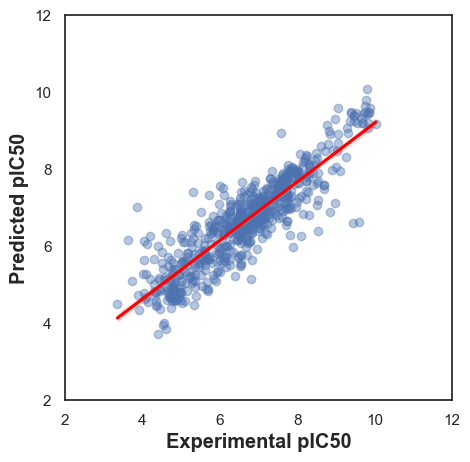

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 12)
ax.set_ylim(2, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

In [59]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import joblib
from IPython.display import display

In [72]:
new_smiles_df = pd.read_excel('lsd_work.xlsx')
print("Loaded data:")
print(new_smiles_df.head())

Loaded data:
                    Compound_Name               SMILES Status
0        Benzene, 1,2,3-trimethyl   CC1=C(C(=CC=C1)C)C  Found
1       Heptane, 5-ethyl-2-methyl       CCC(CC)CCC(C)C  Found
2                        Undecane          CCCCCCCCCCC  Found
3     Octanoic acid, methyl ester       CCCCCCCC(=O)OC  Found
4  Tridecanoic acid, methyl ester  CCCCCCCCCCCCC(=O)OC  Found


In [73]:
# Function to generate Morgan fingerprints for new SMILES
def embeddings(new_smiles_df):
    embedding = []
    for i in new_smiles_df['SMILES']:
        molecule = Chem.MolFromSmiles(i)
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=2048)
        fingerprint_array = np.array(fingerprint)
        embedding.append(fingerprint_array)
    df_fingerprints = pd.DataFrame(embedding, columns=[str(i) for i in range(2048)])
    return df_fingerprints

# Generate fingerprints
X_new = embeddings(new_smiles_df)
print("Fingerprints generated! Shape:", X_new.shape)
print("First few columns:", X_new.columns[:5])

Fingerprints generated! Shape: (34, 2048)
First few columns: Index(['0', '1', '2', '3', '4'], dtype='object')


[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerator
[15:36:47] DEPRECATION WARNING: please use MorganGenerat

In [74]:
X_new

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Load the trained model
model = joblib.load('XGBRegressor.pkl')
print("Model loaded successfully!")

# Make predictions
y_pred = model.predict(X_new)
print("Predictions done! First few predictions:", y_pred[:3])

Model loaded successfully!
Predictions done! First few predictions: [5.4044943 5.635681  5.629329 ]


In [79]:
# create results DataFrame with compound_name
results_df = pd.DataFrame({
    'Compound_Name': new_smiles_df['Compound_Name'],
    'SMILES': new_smiles_df['SMILES'],
    'Predicted_pIC50': y_pred
})

# sort by predicted_pIC50 in descending order
results_df = results_df.sort_values(by = 'Predicted_pIC50', ascending = False)

print('Results table created (sorted by Predicted_pIC50 descending):')
print(results_df.head())

#save to Excel
results_df.to_excel('smiles_predicted_pIC50.xlsx', index= False, engine= 'openpyxl')
print("Results saved to 'smiles_predicted_pIC50.xlsx'")

Results table created (sorted by Predicted_pIC50 descending):
                        Compound_Name                       SMILES  \
9    Valeric acid, 2-pentadecyl ester  CCCCCCCCCCCCCC(C)OC(=O)CCCC   
33             E-2-Octadecadecen-1-ol         CCCCCCCCCCCCCCCC=CCO   
23  Decanoic acid, 2-ethylhexyl ester    CCCCCCCCCC(=O)OCC(CC)CCCC   
6        Undecenoic acid, octyl ester    CCCCCCCCOC(=O)CCCCCCCCC=C   
29           11-Tridecenyl propionate       CCC(=O)OCCCCCCCCCCC=CC   

    Predicted_pIC50  
9              5.92  
33             5.92  
23             5.78  
6              5.69  
29             5.69  
Results saved to 'smiles_predicted_pIC50.xlsx'


In [81]:
print("Machine Learning model built successfully!!!")

Machine Learning model built successfully!!!
